In [35]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
X, y = make_blobs(1000, centers= 6, random_state= 42)

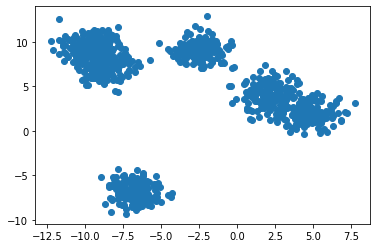

In [19]:
plt.scatter(X[:,0],X[:,1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [ ]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

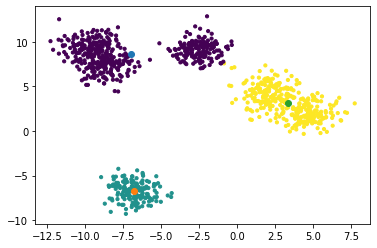

In [31]:
centers = model.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = model.labels_, s=10) #Predicted answer
for center in centers:
    plt.scatter(center[0],center[1])

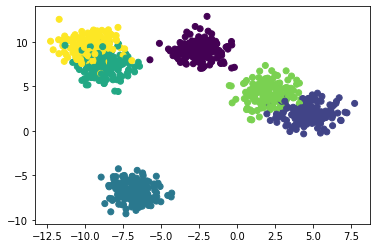

In [26]:
plt.scatter(X[:,0],X[:,1], c = y) #Actual ans of our data

# Rewriting the algo


In [66]:
class KMeans:
    
    def __init__(self, n_clusters, iters=10):
        self.n_clusters= n_clusters    
        self.iters = iters
    def fit(self,X):
        
        errors = []
        self.X = X
        points = random.choices(list(X), k = self.n_clusters) #Create K seed points
        #Create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
        for _ in range(self.iters):
            self.labels = []
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis,cluster))
                distances_np = np.array(distances)
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected_cluster = self.clusters[min_index]
                selected_cluster.points.append(point)
                self.labels.append(min_index)
            for cluster in self.clusters:
                cluster.update_center()
            errors.append(self.errors())
            
    def error(self):
        total = 0 
        for point, label in zip(self.X, self.labels):
            dis = self.clusters[label].distance(point)
            total += dis
        return total 
class Cluster:

    def __init__(self,center):
        self.center = center
        self.points = []
    def update_center(self):
        self.center = np.mean(self.points,axis =0)
        
    def distance(self,point):
        return np.sum((self.center-point)**2)
    def __repr__(self):
        return str(self.center)

[3.64871943 2.78083551]
[-9.33164966  8.2863282 ]
[-1.40570601  8.05477877]
[-3.37804177 -4.03905894]
[-6.95863126 -6.21279439]
[-6.54308209  9.52243559]


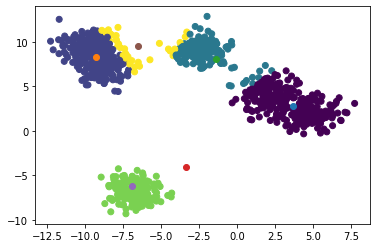

In [71]:
model2 = KMeans(6)
model2.fit(X)
plt.scatter(X[:,0],X[:,1],c= model2.labels)
# for cluster in model2.clusters:
#     print(cluster)
#     plt.scatter(cluster.center[0], cluster.center[1])

# Image Segmentation

In [79]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

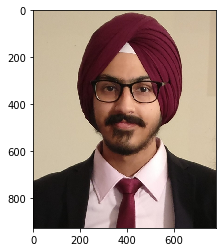

In [103]:
img = cv2.imread("2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [104]:
print(img.shape)
X = img.reshape(-1,3)

(928, 781, 3)


In [105]:
model = KMeans(4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
color_pellet = model.cluster_centers_
color_pellet

array([[ 31.09199579,  19.60097913,  19.65489713],
       [211.99720059, 193.56661387, 170.88149804],
       [165.32251222, 119.4124859 , 102.38864235],
       [ 94.88541   ,  37.74757744,  43.43010845]])

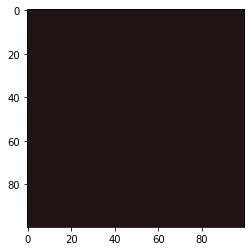

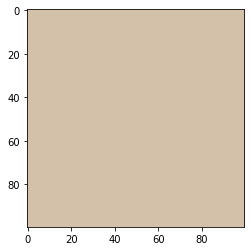

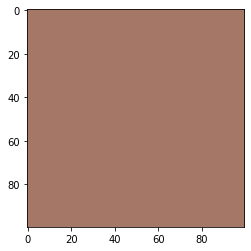

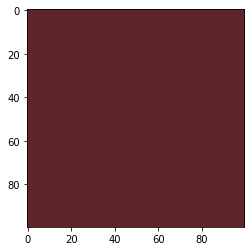

In [107]:
for color in color_pellet:
    color_img = np.zeros([100,100,3])
    color_img[:,:] = color
    plt.figure()
    plt.imshow(color_img.astype(int)) # float value takes only 0 to 1, and int takes 0 to 255. Either
                                        # ^^ Either you change type to int or divide by 255

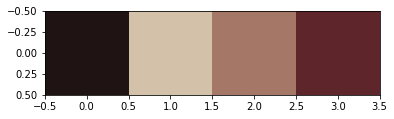

In [108]:
plt.imshow(color_pellet.reshape(1,4,3)/255)

In [109]:
gen = np.zeros([X.shape[0],3])

In [110]:
for i in range(len(gen)):
    gen[i] = color_pellet[model.labels_[i]]
gen = gen.reshape(img.shape)

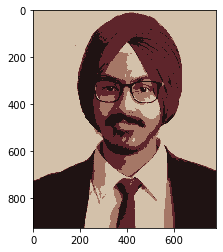

In [111]:
plt.imshow(gen/255)